In [21]:
import numpy as np
from numpy import linalg
import csv, math
import matplotlib.pyplot as plt
%matplotlib inline
import os

def read_x_y(fname):
    f = open(fname, 'r')
    reader = csv.reader(f)
    positions = []
    for row in reader:
        positions.append( [round(float(row[1]),1), round(-float(row[2]),1) + 300, False] )
    return positions

def dist(a,b):
    x1,y1,AUX = a[0],a[1],a[2]
    x2,y2,AUX = b[0],b[1],b[2]
    return math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2))

def getAveragePositions(positions):
    averagex = []
    averagey = []
    nearestx = []
    nearesty = []
    count = 0
    for i in range (len(positions)):
        count +=1
        if count > 6000:
            break
        point1 = positions[i]
        positions[i][2] = True
        for j in range(i+1,len(positions)):
            if (positions[j][2] == False):
                point2 = positions[j]
                if(dist(point1,point2) < 30):            
                    # Append it to the nearest list
                    nearestx.append(point2[0])
                    nearesty.append(point2[1])
                    if(j < len(positions)-1):
                        pass
                        #positions[j][2] = True
            if(len(nearestx) > 2000):
                averagex.append(np.mean(nearestx))
                averagey.append(np.mean(nearesty))
                #print('nearestx ---- '+str(len(nearestx)))
                nearestx = []
                nearesty = []
    print(len(averagex))
    return averagex, averagey

'''
Class point object for positional information
'''


class Vector(object):
    def __init__(self, x, y, x2, y2):
        self.visit = False
        self.points = np.array([[x, y], [x2, y2]])
        self.vector = np.array([x2-x,y2-y])
        self.magnitude = self.calc_magnitude()
        
    def __str__(self):
        return str(self.vector)
    
    def get_distance(self,b):
        return np.sqrt(np.sum((b.points[0] - self.points[0]) ** 2))
    
    def get_xy(self):
        return self.points[0][0], self.points[0][1]
    
    def get_magnitude(self):
        return self.magnitude
    def angle(self):
        return cos
    def calc_magnitude(self):
        return np.sqrt(np.sum((self.points[1] - self.points[0]) ** 2))
    def calc_projection(self,b):
        p = (np.dot(b.vector,self.vector))/(self.magnitude**2)
        return p
    def visited(self):
        self.visit = True
    def isVisited(self):
        return self.visit

class Path(object):
    def __init__(self,name):
        self.name = name
        self.vectors = []
        size = 0
        
    def get_vector(self,ix): 
        return self.vectors[ix]
    
    def add_vector(self,x, y, x2, y2):
        new_vector = Vector(x, y, x2, y2)
        self.vectors.append(new_vector)
        
    def add_positions(self,X,Y):
        self.size = len(X)
        for i in range(len(X)-1):
            self.add_vector(X[i],Y[i],X[i+1],Y[i+1])
    
    def distance(self,b):
        a_x,a_y = a.points[0][0],a.points[0][1]
        b_x,b_y = b.points[0][0],b.points[0][1]


    def get_vector(self,ix): 
        return self.vectors[ix]

    def add_vector(self,x, y, x2, y2):
        new_vector = Vector(x, y, x2, y2)
        self.vectors.append(new_vector)

    def add_positions(self,X,Y):
        self.size = len(X)
        for i in range(len(X)-1):
            self.add_vector(X[i],Y[i],X[i+1],Y[i+1])

    def distance(self,b):
        a_x,a_y = a.points[0][0],a.points[0][1]
        b_x,b_y = b.points[0][0],b.points[0][1]

    def compare_path(self,path2):
        differences = []
        #print('-----------------------')
        # Iterate through points in the path
        for a in self.vectors:
            closest = None
            minDist = 50
            for b in path2.vectors:
                if (a.get_distance(b) < minDist and not(b.visit)):
                    minDist = a.get_distance(b)
                    closest = b

            if closest != None:
                closest.visit = True
                a1 = a.calc_projection(closest)
                a2 = np.sqrt((closest.magnitude**2)-(a1**2))
                if not(np.isnan(a2)):
                    differences.append(a2)
            path2.reset_visited()
        return differences

    def compare_path2(self,path2):
        differences = []
        # Iterate through points in the path
        for a in self.vectors:
            minDist = 30
            closest = None
            # Find the closest path2 point to point A
            for b in path2.vectors:
                    if (a.get_distance(b) < minDist and not(b.visit)):
                        minDist = a.get_distance(b)
                        closest = b

            #print('--------')
            # Calculate the iteration, xrange for vector a
            x_range = int( a.points[1][0]*10-a.points[0][0] )
            for i in range(x_range+1):
                iterator = i/10
                a_x,a_y = a.points[0][0],a.points[0][1]
                xiter,yiter = a_x+a.vector[0]*iterator, a_y+a.vector[1]*iterator
                #print(str(xiter)+' , '+str(yiter))
                point = Vector(xiter, yiter, a.points[1][0], a.points[1][1])
                #### After getting iteration, calculate difference

                ''' minDist = 10000000
                for b in path2.vectors:
                    if (point.get_distance(b) < minDist and not(b.visit)):
                        minDist = point.get_distance(b)
                        closest = b
                print(closest)'''

                if closest != None:
                    #closest.visit = True
                    a1 = point.calc_projection(closest)
                    a2 = np.sqrt((closest.magnitude**2)-(a1**2))
                    if not(np.isnan(a2)):
                        differences.append(a2)
                #path2.reset_visited()
        return differences

    def reset_visited(self):
        for v in self.vectors:
            v.visited = False

def pixels_to_cm(positions):
    # convert pixels to inches
    results = []
    for position in positions:
        results.append(position/3.27)
    return results

# Measuring positions of the vehicle
The code snippets below take CSV files from positional video recordings of the remote control car. In this notebook we will analyze the vehicles positions on different tracks.

Calculate average x, y positions of the tracks=
* does the mean of the robot path, is it or not different thatn the human path
* Student tea test, demonstrate normality - is it normal
* null hypothesis, assume that the mean robot error

In [2]:
import os

cwd = os.getcwd()
directory = cwd+'/csvs/circuitcsv/'
rnn,rnncat, linear, cat, human = [],[],[],[],[]

for filename in os.listdir(directory):
    if filename.endswith(".csv") or filename.endswith(".py"): 
        #print(os.path.join(directory, filename))
        fdir = os.path.join(directory, filename)
        if 'rnncat' in  filename:
            rnncat.append(read_x_y(str(fdir)))
            pass
        if 'cat' in filename:
            cat.append(read_x_y(str(fdir)))
            pass
        if 'linear' in filename:
            linear.append(read_x_y(str(fdir)))
            pass
        if 'rnn' in filename:
            rnn.append(read_x_y(str(fdir)))
            pass
        if 'human' in filename:
            human.append(read_x_y(str(fdir)))
            pass
        pass
    else:
        continue
pass

### Categorical - Average Positions

In [23]:
pos = cat
if(len(pos) != 0):
    print("== cat")
    totalpos = []
    for i in range(len(pos)):
        #print("---- "+str(len(pos[i])))
        totalpos.extend(pos[i])
    catx,caty = getAveragePositions(totalpos)

== cat
1050


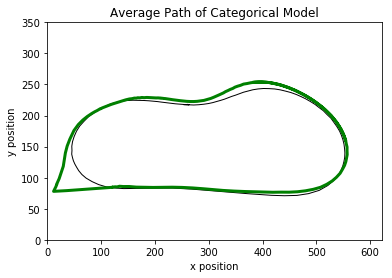

In [33]:
plt.plot(hx1,hy1,c='black',linewidth='1')

n=750
s=100
catx1= catx[s:len(catx)-n]
caty1 = caty[s:len(caty)-n]




plt.plot(catx1,caty1, c='g',linewidth='3')
plt.xlim(0, 622)
plt.ylim(0, 350)     # set the ylim to ymin, ymax
plt.title('Average Path of Categorical Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### Linear - Average Positions

In [34]:
pos = linear
if(len(pos) != 0):
    print("== linear")
    totalpos = []
    for i in range(len(pos)):
        #print("---- "+str(len(pos[i])))
        totalpos.extend(pos[i])
    linearx,lineary = getAveragePositions(totalpos)
'''linearx = linearx[4:]
lineary = lineary[4:]'''

== linear
188


'linearx = linearx[4:]\nlineary = lineary[4:]'

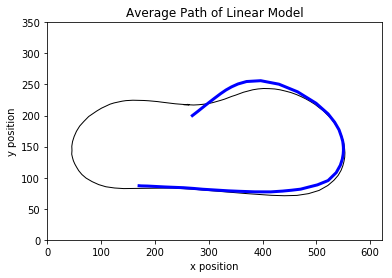

In [47]:
plt.plot(hx1,hy1,c='black',linewidth='1')

n=145
linearx1=linearx[:len(linearx)-n]
lineary1=lineary[:len(lineary)-n]
plt.plot(linearx1,lineary1,c='blue',linewidth='3')
plt.xlim(0, 622)
plt.ylim(0, 350)     # set the ylim to ymin, ymax
plt.title('Average Path of Linear Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### Human - Average Positions

In [5]:
pos = human
if(len(pos) != 0):
    print('== human')
    totalpos = []
    for i in range(len(pos)):
        totalpos.extend(pos[i])
    hx,hy = getAveragePositions(totalpos)
n=5
hx = hx[:len(hx)-n]
hy = hy[:len(hy)-n]

== human
667


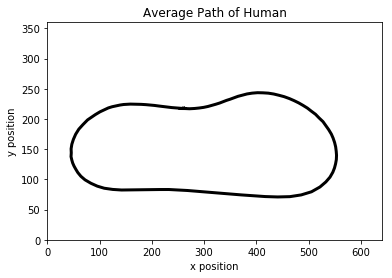

In [6]:
n=503
#hx.append(270)
#hy.append(220)

hx1 = hx[:len(hx)-n]
hy1 = hy[:len(hy)-n]

#plt.plot(hx,hy,c='black',linewidth='1')

#plt.plot(linearx[:len(linearx)-n],lineary[:len(lineary)-n],c='red')
plt.plot(hx1,hy1,c='black',linewidth='3')
#plt.plot(rnnx[s:len(rnnx)-n],rnny[s:len(rnnx)-n],c='b')
plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title('Average Path of Human')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### RNN Single Output Model

In [48]:
pos = rnn[3:]
if(len(pos) != 0):
    print('== rnn')
    totalpos = []
    for i in range(len(pos)):
        totalpos.extend(pos[i])
    rnnx,rnny = getAveragePositions(totalpos)


== rnn
1859


1859


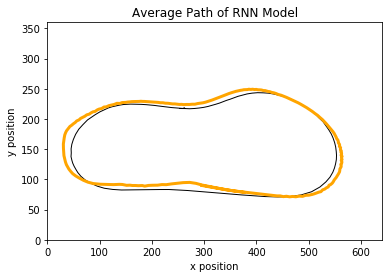

In [58]:
print(len(rnnx))
plt.plot(hx1,hy1,c='black',linewidth='1')

n=50
s=1550
rnnx1 = rnnx[s:len(rnnx)-n]
rnny1 = rnny[s:len(rnnx)-n]

#rnnx1 = rnnx1[1::2]
#rnny1 = rnny1[1::2]

plt.plot(rnnx1,rnny1,c='orange',linewidth='3')

plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title('Average Path of RNN Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### RNN Categorical Output

In [59]:
pos = rnncat
if(len(pos) != 0):
    print('== rnn')
    totalpos = []
    for i in range(len(pos)):
        totalpos.extend(pos[i])
    rnncatx,rnncaty = getAveragePositions(totalpos)


== rnn
718


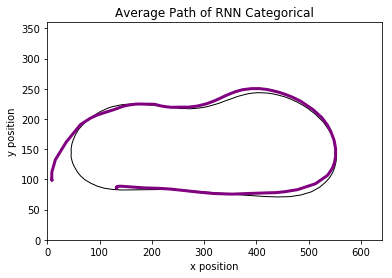

In [63]:
plt.plot(hx1,hy1,c='black',linewidth='1')

n=500
s=40
rx1 = rnncatx[s:len(rnncatx)-n]
ry1 = rnncaty[s:len(rnncaty)-n]

rx1 = rx1[1::2]
ry1 = ry1[1::2]
#rx1 = rx1[1::2]
#ry1 = ry1[1::2]

plt.plot(rx1,ry1,c='purple',linewidth='3')

plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title('Average Path of RNN Categorical')
plt.xlabel('x position')
plt.ylabel('y position')


plt.show()

### All paths overlaid

TypeError: title() missing 1 required positional argument: 's'

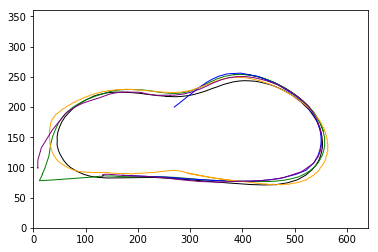

In [95]:
plt.plot(hx1,hy1,c='black',linewidth='1')
plt.plot(catx1,caty1, c='g',linewidth='1')
plt.plot(linearx1,lineary1,c='blue',linewidth='1')
plt.plot(rnnx1,rnny1,c='orange',linewidth='1')
plt.plot(rx1,ry1,c='purple',linewidth='1')

plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title()
plt.xlabel('x position')
plt.ylabel('y position')
plt.figure(figsize=(200,100))
fig.savefig('allpaths.png', dpi=300)

### Histograms

In [64]:
cat_path = Path('Categorical')
cat_path.add_positions(catx1,caty1)

linear_path = Path('Linear')
linear_path.add_positions(linearx1,lineary1)

rnn_path = Path('RNN')
rnn_path.add_positions(rnnx1,rnny1)

rnncat_path = Path('RNN Categorical')
rnncat_path.add_positions(rx1,ry1)

human_path = Path('human')
human_path.add_positions(hx1,hy1)

In [68]:
diff_human_cat = human_path.compare_path(cat_path)

54
1.8813025205409477


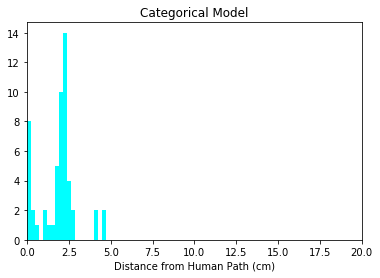

In [69]:
print(len(diff_human_cat))
cm_diff_human_cat = pixels_to_cm(diff_human_cat)
print(np.mean(cm_diff_human_cat))

plt.hist(cm_diff_human_cat, bins=bin_num, color='cyan')  # arguments are passed to np.histogram
plt.title("Categorical Model")
plt.xlabel('Distance from Human Path (cm)')
plt.xlim([0,20])
plt.show()

In [70]:
diff_linear_human = human_path.compare_path(linear_path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in sqrt


40
5.480748662656375


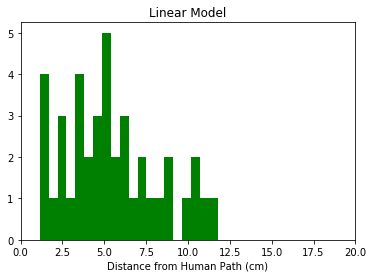

In [71]:
cm_diff_linear_human = pixels_to_cm(diff_linear_human)
print(len(cm_diff_linear_human))
print(np.mean(cm_diff_linear_human))

plt.hist(cm_diff_linear_human, bins=bin_num,color='g')  # arguments are passed to np.histogram
plt.title("Linear Model")
plt.xlim([0,20])

plt.xlabel('Distance from Human Path (cm)')
plt.show()

In [72]:
print(len(rnn_path.vectors))
print(len(human_path.vectors))

258
158


In [73]:
diff_rnn_human = human_path.compare_path(rnn_path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in sqrt


In [74]:
cm_diff_rnn_human = pixels_to_cm(diff_rnn_human)
print(len(rnn_path.vectors))

258


109
1.598460338553266


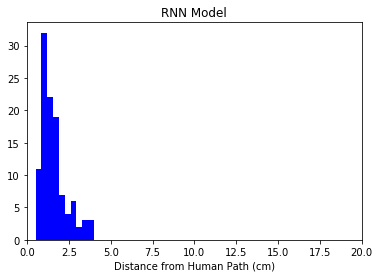

In [75]:
print(len(cm_diff_rnn_human))
print(np.mean(cm_diff_rnn_human))
plt.hist(cm_diff_rnn_human, bins=10,color='b')  # arguments are passed to np.histogram
plt.title("RNN Model")
plt.xlim([0,20])
plt.xlabel('Distance from Human Path (cm)')
plt.show()

In [76]:
diff_rnncat_human = human_path.compare_path(rnncat_path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in sqrt


In [77]:
cm_diff_rnncat_human = pixels_to_cm(diff_rnncat_human)

4.421275421016233
70


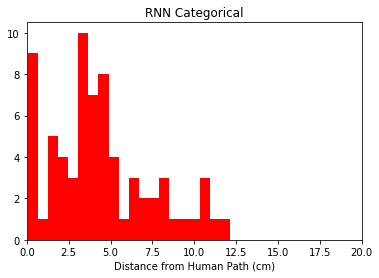

In [78]:
print(np.mean(cm_diff_rnncat_human))
print(len(cm_diff_rnncat_human))
plt.hist(cm_diff_rnncat_human, bins=bin_num,color='red')  # arguments are passed to np.histogram
plt.title("RNN Categorical")
plt.xlim([0,20])
plt.xlabel('Distance from Human Path (cm)')
plt.show()

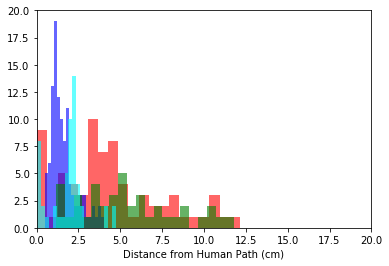

In [82]:
bin_num = 20

plt.hist(cm_diff_rnncat_human, bins=bin_num,color='red',alpha = 0.6)  # arguments are passed to np.histogram
plt.hist(cm_diff_rnn_human, bins=bin_num,color='b',alpha = 0.6)  # arguments are passed to np.histogram
plt.hist(cm_diff_linear_human, bins=bin_num,color='g',alpha = 0.6)  # arguments are passed to np.histogram
plt.hist(cm_diff_human_cat, bins=bin_num, color='cyan',alpha = 0.6)  # arguments are passed to np.histogram
plt.xlim([0,20])
plt.ylim([0,20])

plt.xlabel('Distance from Human Path (cm)')
plt.show()

In [ ]:
print(np.var(cm_diff_rnncat_human))

In [ ]:
import numpy

a = numpy.asarray(cm_diff_human_cat)
numpy.savetxt("cm_diff_rnncat_human.csv", a, delimiter=",")

In [ ]:
path2 = None
path2 = Path('one')
path2.add_vector(0,0,1,1)
path2.add_vector(1,1,2,1.5)

path4 = None
path4 = Path('three')
path4.add_vector(0,0,1,0)
path4.add_vector(1,0,2,0.5)


path4.compare_path(path2)